In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Read data
df_census = pd.read_csv('Resources/clean_data/Census.csv')
df_census

,2nd Mortgage Only (%),2nd Mortgage or Equity Loan (%),Both 2nd & Equity Loan (%),Equity Loan Only (%),Home Value $100k-$149k (%),Home Value $150k-$199k (%),Home Value $200k-$299k (%),Home Value $300k-$499k (%),Home Value $500k+ (%),Home Value $50k-$90k (%),...,"Income $50k-$74,999 (%)","Income $75k-$99,999 (%)",Income <$10k (%),Median Home Value ($)(1000X),Median Housing Cost (monthly) ($),Median Income ($)(1000X),Median Real Estate Taxes ($),No 2nd or Equity Loan (%),State,Year
0,4.9,17.2,0.6,12.3,20.3,17.8,16.8,8.7,3.7,23.6,...,21.7,15.6,3.9,142.7,1130.0,61.964,568.0,82.3,Alabama,2010
1,4.5,14.9,0.7,10.4,9.6,15.6,35.2,26.5,8.1,2.9,...,17.8,17.0,1.2,255.7,1772.0,94.747,3177.0,84.4,Alaska,2010
2,5.8,21.8,0.8,16.0,20.5,19.5,21.4,14.4,6.8,13.4,...,22.6,16.2,2.8,177.0,1442.0,66.539,1489.0,77.4,Arizona,2010
3,4.1,10.5,0.2,6.4,23.9,16.2,12.2,6.4,2.1,27.0,...,22.8,15.1,2.8,122.6,987.0,59.393,703.0,89.3,Arkansas,2010
4,7.6,26.3,1.6,18.6,6.0,8.6,17.4,29.1,34.0,3.4,...,17.7,15.9,2.1,377.7,2242.0,88.444,3284.0,72.2,California,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,58290.0,303356.0,11514.0,245066.0,1591788.0,710945.0,197240.0,65247.0,66085.0,185507.0,...,536246.0,450785.0,81690.0,247.0,1990.0,80.372,NaN,2576094.0,Florida,2018
464,25030.0,199591.0,5179.0,174561.0,294869.0,400054.0,237561.0,82421.0,70962.0,8759.0,...,143466.0,143753.0,14336.0,406.9,92.0,121.565,NaN,900729.0,Massachusetts,2018
465,3043.0,14236.0,188.0,11193.0,8147.0,24676.0,22666.0,16753.0,17685.0,552.0,...,8230.0,9267.0,1981.0,627.0,0.0,151.147,NaN,76755.0,District of Columbia,2018
466,18174.0,72368.0,3070.0,54194.0,218789.0,184533.0,50940.0,13839.0,8499.0,5888.0,...,93726.0,89817.0,5152.0,310.0,222.0,93.060,NaN,416459.0,Utah,2018


In [4]:
# Filter data to just get information about California
ca_housing_df = df_census[df_census['State'] == 'California']
ca_housing_df

,2nd Mortgage Only (%),2nd Mortgage or Equity Loan (%),Both 2nd & Equity Loan (%),Equity Loan Only (%),Home Value $100k-$149k (%),Home Value $150k-$199k (%),Home Value $200k-$299k (%),Home Value $300k-$499k (%),Home Value $500k+ (%),Home Value $50k-$90k (%),...,"Income $50k-$74,999 (%)","Income $75k-$99,999 (%)",Income <$10k (%),Median Home Value ($)(1000X),Median Housing Cost (monthly) ($),Median Income ($)(1000X),Median Real Estate Taxes ($),No 2nd or Equity Loan (%),State,Year
4,7.6,26.3,1.6,18.6,6.0,8.6,17.4,29.1,34.0,3.4,...,17.7,15.9,2.1,377.7,2242.0,88.444,3284.0,72.2,California,2010
56,6.3,23.0,1.4,16.6,7.0,9.0,17.9,28.5,32.2,3.8,...,17.3,15.3,2.3,363.6,2182.0,89.279,3291.0,75.6,California,2011
108,5.6,20.9,1.1,15.3,7.2,9.3,18.0,28.5,31.3,4.1,...,17.1,15.2,2.3,358.1,2119.0,91.024,3336.0,78.0,California,2012
160,4.7,18.5,1.1,13.8,5.7,8.0,16.3,29.2,34.9,3.2,...,16.8,14.8,2.2,383.2,2059.0,93.538,3412.0,80.4,California,2013
212,4.1,17.0,0.8,12.9,4.1,6.2,14.7,30.0,40.2,2.1,...,16.0,14.8,2.1,427.7,2068.0,96.305,3548.0,82.1,California,2014
264,3.6,15.7,0.8,12.0,22.2,30.5,22.0,10.7,11.9,1.7,...,15.4,14.5,2.0,462.0,0.0,100.223,NaN,83.6,California,2015
316,3.1,15.2,0.7,12.0,19.4,29.4,23.1,12.0,13.7,1.4,...,14.8,14.1,2.0,491.1,0.0,103.266,NaN,84.2,California,2016
368,140742.0,684653.0,27618.0,543911.0,834760.0,1430771.0,1234904.0,658249.0,763074.0,55518.0,...,691382.0,681502.0,97564.0,529.0,1023.0,108.609,NaN,4313873.0,California,2017
425,129964.0,642797.0,27484.0,512833.0,705843.0,1349694.0,1280746.0,673367.0,879015.0,49439.0,...,662661.0,660584.0,97819.0,566.1,928.0,113.027,NaN,4318430.0,California,2018


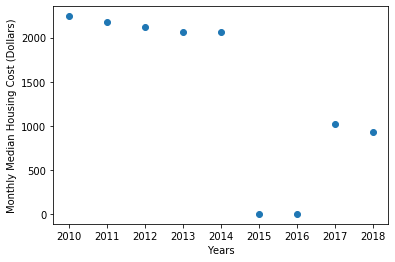

In [5]:
# Visually inspect relationship between Median Housing Cost and Year
x = ca_housing_df['Year']
y = ca_housing_df['Median Housing Cost (monthly) ($)']
plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Monthly Median Housing Cost (Dollars)')
plt.show()

In [6]:
# Read 2017 and 2018 data to see why there are discrepancies
df_census_2017 = pd.read_csv('Resources/clean_data/census_2017.csv')
df_census_2018 = pd.read_csv('Resources/clean_data/census_2018.csv')
df_census_2017.head()

,Year,State,Home Value <$50k (%),Home Value $50k-$90k (%),Home Value $100k-$149k (%),Home Value $150k-$199k (%),Home Value $200k-$299k (%),Home Value $300k-$499k (%),Home Value $500k+ (%),Median Home Value ($)(1000X),...,Income <$10k (%),"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($)
0,2017,Alabama,45154,134584,413329,81925,21023,5464,4706,158.0,...,19694,54860,50583,83271,146556,114273,145414,91534,74.553,1205
1,2017,Alaska,2324,1966,51086,37285,7595,1480,561,286.9,...,1811,3137,3884,7240,15288,16736,27454,26747,103.942,19
2,2017,Arizona,25820,58155,618612,253759,70881,21698,15426,238.8,...,29096,69658,67092,120361,202392,171564,220445,183743,80.853,822
3,2017,Arkansas,29303,92956,246125,36118,7160,2800,1706,142.8,...,12622,33571,30251,53837,89343,70528,73921,52095,71.081,1194
4,2017,California,48868,55518,834760,1430771,1234904,658249,763074,529.0,...,97564,224843,198282,363068,691382,681502,1134975,1634528,108.609,1023
